In [28]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import time
import os
import imageio
import imageio.v3 as iio
from tqdm import tqdm
from scipy import stats
from pathlib import Path

# sns.set_context('notebook', font_scale=1)
# sns.set_style('darkgrid')
# sns.set_palette('Paired')


In [69]:
current_path = Path(os.getcwd())

WindowsPath('C:/Users/aleks/git/tu-neural-dynamics/04-dynamical_systems/gif_change_A')

In [80]:
def get_dx(x, A=np.array([[-2, -1], [1, -2]]), s=np.array([0, 0]), alpha_nonlinearity=0):
    x, y = x
    sx, sy = s
    a = alpha_nonlinearity
    c = 9
    dx = (1 - a) * (A[0, 0] * x + A[0, 1] * y) + a * (-y - x * (x**2 + y**2 - c)) + sx
    dy = (1 - a) * (A[1, 0] * x + A[1, 1] * y) + a * (x - y * (x**2 + y**2 - c)) + sy
    return np.array([dx, dy])


def get_vector_field(x_span=(-5, 5), y_span=(-5, 5), n_points=50, A=np.array([[-2, -1], [1, -2]]), s=np.array([0, 0]), alpha_nonlinearity=0):
    x_grid = np.linspace(*x_span, n_points)
    y_grid = np.linspace(*y_span, n_points)
    x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)
    vector_field = np.zeros((2, n_points, n_points))
    for i in range(n_points):
        for j in range(n_points):  
            xy = np.array([x_mesh[i, j], y_mesh[i, j]])
            vector_field[:, i, j] = get_dx(xy, A=A, s=s, alpha_nonlinearity=alpha_nonlinearity)
            
    return x_grid, y_grid, vector_field
    


def plot_vector_field(x_grid, y_grid, vector_field, figsize=(6, 6)):
    u1, u2, vf = x_grid, y_grid, vector_field
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.quiver(u1, u2, vf[0], vf[1], color='grey', alpha=0.9)
    ax.streamplot(u1, u2, vf[0], vf[1], color=np.log(vf[0]**2 + vf[1]**2), cmap='magma_r', density=1.5, linewidth=1)
    
    return fig

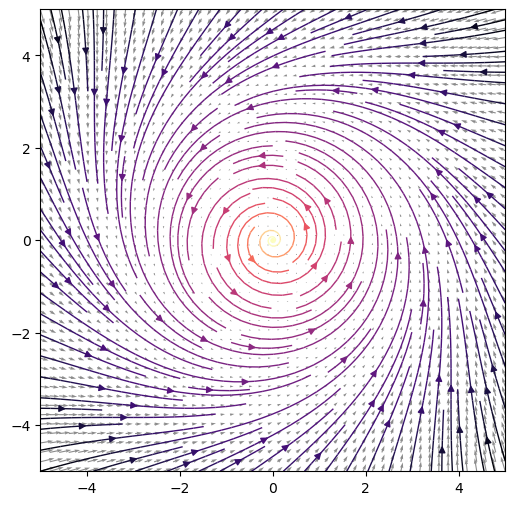

In [86]:
r = 0.2
s = (0, 0)

A = np.array([[-r, -1], [1, -r]])

x, y, vf = get_vector_field(A=A, s=s, alpha_nonlinearity=0.04)
fig = plot_vector_field(x, y, vf)

In [20]:
from pathlib import Path

In [42]:
%%time

current_path = Path(os.getcwd())

ANALYSIS_TYPE = 'change_input'

subfolder = f"gif_{ANALYSIS_TYPE}"

try:
    os.mkdir(subfolder)
except:
    pass

n_times = 100
r = 0.3

A = np.array([[-r, -1], [1, -r]])

rho_grid = np.linspace(0, 4, n_times)
theta_grid = np.linspace(0, 10 * 2 * np.pi, n_times)

for i in tqdm(range(n_times)):
    rho, theta = rho_grid[i], theta_grid[i]
    s = (rho * np.cos(theta), rho * np.sin(theta))
    x, y, vf = get_vector_field(A=A, s=s)
    fig = plot_vector_field(x, y, vf, figsize=(6, 6))
    plt.gca().set_aspect('equal')  
    plt.savefig(current_path / subfolder / f"fig{i}.png", dpi=200, bbox_inches='tight')
    plt.close()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:53<00:00,  1.74s/it]

CPU times: total: 2min 51s
Wall time: 2min 53s


#### Creating GIFs

In [54]:
%%time

current_path = Path(os.getcwd())

ANALYSIS_TYPE = 'change_A'

subfolder = f"gif_{ANALYSIS_TYPE}"

try:
    os.mkdir(subfolder)
except:
    pass

n_plots = 100
r = 0.3

b_grid = np.linspace(-2, 2, n_plots)
s = (0, 0)

for i in tqdm(range(n_plots)):
    b = b_grid[i]
    A = np.array([[-r, b], [1, -r]])
    x, y, vf = get_vector_field(A=A, s=s)
    fig = plot_vector_field(x, y, vf, figsize=(6, 6))
    plt.gca().set_aspect('equal')  
    plt.savefig(current_path / subfolder / f"fig{i}.png", dpi=200, bbox_inches='tight')
    plt.close()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:48<00:00,  1.69s/it]

CPU times: total: 2min 48s
Wall time: 2min 48s


In [90]:
%%time

current_path = Path(os.getcwd())

ANALYSIS_TYPE = 'change_nonlinearity'

subfolder = f"gif_{ANALYSIS_TYPE}"

try:
    os.mkdir(subfolder)
except:
    pass

n_plots = 30
r = 0.3

a_grid = np.logspace(-3, n_plots)
s = (0, 0)

for i in tqdm(range(n_plots)):
    a = a_grid[i]
    A = np.array([[-r, -1], [1, -r]])
    x, y, vf = get_vector_field(A=A, s=s, alpha_nonlinearity=a)
    fig = plot_vector_field(x, y, vf, figsize=(6, 6))
    plt.gca().set_aspect('equal')  
    plt.savefig(current_path / subfolder / f"fig{i}.png", dpi=200, bbox_inches='tight')
    plt.close()

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [01:53<00:00,  3.77s/it]

CPU times: total: 1min 52s
Wall time: 1min 53s


In [95]:
shape = iio.imread(os.path.join(subfolder, f"fig0.png")).shape

frames = np.stack([iio.imread(os.path.join(subfolder, f"fig{i}.png")) for i in range(n_plots) if iio.imread(os.path.join(subfolder, f"fig{i}.png")).shape == shape], axis=0)

gif_path = f"{ANALYSIS_TYPE}.gif"
iio.imwrite(gif_path, frames, duration=0.5)